In [222]:
# import all dependencies
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 

In [223]:
# define all functions to be used
def define_city(ncity = 100, area = [100,100], SEED = 161):
    """Create a dictionay with the random location of cities in the specified area """
    cities_dict = {}
    np.random.seed(SEED)
    city_arr_x = np.array(range(ncity))
    city_arr_y = np.array(range(ncity))
    np.random.shuffle(city_arr_x)
    np.random.shuffle(city_arr_y)
    cities = pd.DataFrame({'X':city_arr_x , 'Y':city_arr_y}, index=range(ncity))
    return cities

def print_map(city_map):
    for index, row in city_map.iterrows():
        plt.plot(row['X'],row['Y'], 'ro')
    
    plt.title('City location')
    plt.show()  

def print_path(path, city_map):
    for index, row in city_map.iterrows():
        plt.plot(row['X'],row['Y'], 'ro')

    X = []
    Y = []
    for index in path: 
        X.append(city_map.iloc[index].X)
        Y.append(city_map.iloc[index].Y)
    
    plt.plot(X,Y)
    plt.title('Travel path')
    plt.show()  


def distance(city1, city2):
    distan = 0
    #print(city1['X'], city1['Y'])
    X_dist = (city2['X']-city1['X'])**2
    Y_dist = (city2['Y']-city1['Y'])**2
    distan = math.sqrt((X_dist + Y_dist))
    return distan

def fitness(population, cities):
    dist = 0
    vec = []
    for index, chromosome in population.iterrows():
        for i in range(len(chromosome)-1):
            dist = dist + distance(cities.iloc[chromosome[i]], cities.iloc[chromosome[i+1]])
        dist = dist + distance(cities.iloc[chromosome[len(chromosome)-1]], cities.iloc[chromosome[0]])
        vec.append(dist)
        dist = 0
    return vec


def generate_population(individuals, genes = 100, population = 100, gene_value = 100):
    pop = {}
    for ind in range(5*population):
        pop[ind] = random.sample(range(gene_value), genes)

    pop_df = pd.DataFrame.from_dict(pop, orient='index')
    fit = fitness(pop_df, individuals)
    pop_df["fit"] = fit
    pop_df = pop_df.sort_values(by=['fit'], ascending=True)
    pop_df = pop_df.iloc[:population]
    return pop_df

def mutation(chromosome):
    size = len(chromosome) # remove one due fit column
    changes = np.random.randint(size, size = 2)
    chromosome[changes[0]], chromosome[changes[1]] = chromosome[changes[1]], chromosome[changes[0]] 
    return chromosome

def cross_over(chromo1, chromo2):
    size = len(chromo1) 
    index = np.random.randint(size)
    #print("Size: ", size)
    #print("Len of chromosome initial: ", len(chromo1), len(np.unique(chromo1, axis=0)))
    #print("Len of chromosome 2 initial: ", len(chromo2), len(np.unique(chromo2 ,axis=0)))
    #print("Index: ",index)
    chr1 = chromo1[:index]
    chr2 = chromo2[:index]
    chromo1[:index], chromo2[:index] = chr2, chr1
    
    #print("Len of chromosome initial: ", len(chromo1), len(np.unique(chromo1, axis=0)))
    #print("Len of chromosome 2 initial: ", len(chromo2), len(np.unique(chromo2 ,axis=0)))
    #print("Chromo1 initial: ", chromo1)
    chromo1_index = np.unique(chromo1, return_index = True)[1]
    chromo1 = [chromo1[index] for index in sorted(chromo1_index)]
    chromo2_index = np.unique(chromo2, return_index = True)[1]
    chromo2 = [chromo2[index] for index in sorted(chromo2_index)]
    #chromo2 = np.unique(chromo2, axis = 0)
    #print("Chromo1 unique: ", chromo1)
    miss1 = []
    miss2 = []

    for number in range(size):
        if not (number in chromo1):
            miss1.append(number)
    for number in range(size):
        if not (number in chromo2):
             miss2.append(number)
             
    #print("missing 1: ", miss1)
    #print("missing 2: ", miss2)

    
    chromo1 = np.append(chromo1, np.array(miss1))
    chromo2 = np.append(chromo2, np.array(miss2))
    
    return chromo1, chromo2


def select_partner(gene, index):
    selected = random.sample(range(gene), 3)

    for value in selected:
        if (value != index) & (value != 0):
            #print("Partner Index: ", value)
            return value


In [224]:
# Define global variables
epochs = 350 # number of times the iteration will happen
mut = 0.1 # probability that the mutation happen
cross = 0.6 # probability that cross over happen
ncity = 100
pop = 1500


In [225]:
# create city maps
city = define_city()
display(city.head(20))

,X,Y
0,91,40
1,7,57
2,93,89
3,55,50
4,62,20
5,9,15
6,25,90
7,20,93
8,98,85
9,30,55


In [226]:
# create initial population to the GA
population = generate_population(city,100,pop,100) # generate population
population.reset_index(inplace= True, drop= True) # reset Ids
display(population.head(20))

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,fit
0,47,91,84,36,55,82,39,66,26,49,...,33,6,48,41,87,40,65,85,5,4404.704271
1,75,36,9,90,6,30,57,35,15,54,...,26,60,88,37,5,85,86,10,91,4455.674165
2,30,40,1,70,51,99,53,26,75,97,...,64,28,22,50,9,93,41,17,24,4513.503862
3,33,88,76,6,80,86,22,24,9,74,...,47,54,21,8,59,43,44,93,75,4543.535743
4,65,92,22,89,11,23,57,85,34,90,...,30,59,32,16,9,73,79,84,60,4557.503234
5,66,94,30,81,39,20,40,42,93,92,...,4,51,28,97,50,15,60,10,62,4559.895201
6,47,32,50,87,7,25,59,57,2,83,...,93,95,70,76,61,29,52,5,89,4572.077365
7,20,40,8,90,34,87,0,2,41,98,...,78,46,60,97,53,75,65,94,62,4578.465909
8,92,90,54,35,82,51,39,43,68,32,...,0,3,93,5,91,48,86,31,6,4586.698616
9,13,22,21,72,24,23,80,43,0,51,...,99,94,17,1,88,67,83,44,27,4593.294684


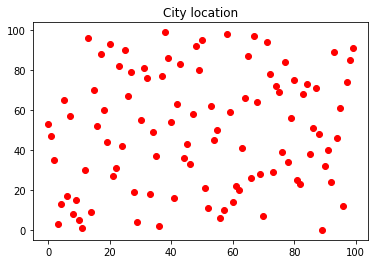

In [227]:
# print city location 

print_map(city)

Menor distancia inicial:  4404.704271295108


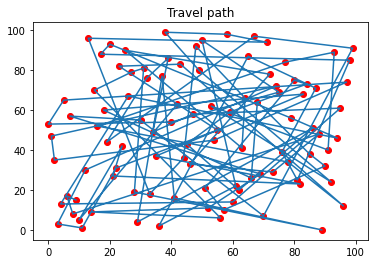

In [228]:
# Print initial best path 
path_dist = population.iloc[0]['fit']
path = population.drop(columns= ['fit'])
path = path.iloc[0]
print("Menor distancia inicial: ", path_dist)
print_path(path, city)

In [229]:
minimal_distance = []
minimal_distance.append(population.iloc[0]['fit'])
for epoch in range(epochs):
    print("Epoch: ", epoch) 
    population.drop(columns=['fit'], inplace=True, axis = 0)
    for index, chromo in population.iterrows():
        prob = np.random.rand() 
        if (prob <= mut) & (index != 0):
            chromo = mutation(chromo) # mutation happen
        prob = np.random.rand()     
        if (prob <= cross) & (index != 0):
            partner_index = select_partner(ncity, index)
            partner = population.iloc[partner_index]
            ch1,ch2 = cross_over(chromo, partner)
            population.iloc[index] = ch1
            population.iloc[partner_index] = ch2
    fit = fitness(population.astype(int), city) # recalculate fitness
    population['fit'] = fit

    population.sort_values(by=['fit'], ascending=True, inplace=True) # order population by smaller values
    population.reset_index(inplace= True, drop= True) # reset Ids
    minimal_distance.append(population.iloc[0]['fit'])

Epoch:  0


<ipython-input-223-7fcb46df6d04>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chromo1[:index], chromo2[:index] = chr2, chr1
/home/nireplag/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/nireplag/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1043: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc[in

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  91
Epoch:  

Smaller distance 2054.629911130104
Best path found is:  [67. 66. 17. 30. 27. 64. 25. 83. 39. 12.  0. 43. 79.  5. 36. 84. 52. 89.
 28. 65. 77.  9. 76. 70. 58. 75. 21. 40. 87. 95. 85. 37. 91. 98. 71. 14.
 81. 49. 99. 42. 15. 60. 33. 46. 53. 55. 97. 24. 94. 38.  6.  7. 48. 35.
 78. 68. 44.  8.  2. 63. 57. 20. 90. 59. 34. 54. 86. 31. 51. 18. 73. 19.
 22. 23. 29.  4. 47. 10. 96. 13. 92. 56. 62. 80. 11. 16.  3. 45. 26. 41.
 61. 82. 50. 74. 88. 69.  1. 72. 32. 93.]


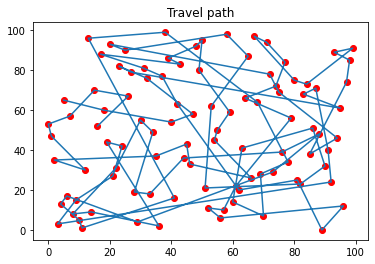

In [230]:
min_distance = population.iloc[0]['fit']
path = population.drop(columns= ['fit'])
path = path.iloc[0]
print("Smaller distance", str(min_distance))
print("Best path found is: ", path.values)

print_path(path.astype(int), city)

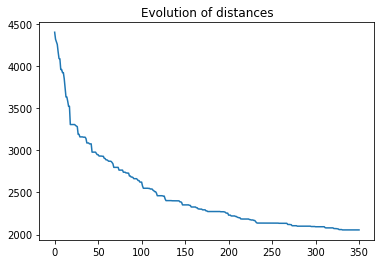

In [231]:
# print evolution of distances 
plt.plot(minimal_distance)
plt.title("Evolution of distances")
plt.show()

In [232]:
display(population.head(20))

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,fit
0,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,82.0,50.0,74.0,88.0,69.0,1.0,72.0,32.0,93.0,2054.629911
1,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,82.0,50.0,74.0,88.0,69.0,1.0,32.0,72.0,13.0,2055.608559
2,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,61.0,82.0,50.0,74.0,88.0,69.0,1.0,32.0,72.0,2066.568677
3,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,61.0,82.0,50.0,74.0,88.0,69.0,1.0,32.0,72.0,2066.568677
4,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,61.0,82.0,50.0,74.0,88.0,69.0,1.0,32.0,72.0,2066.568677
5,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,61.0,82.0,50.0,74.0,88.0,69.0,1.0,32.0,72.0,2066.568677
6,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,61.0,82.0,50.0,74.0,88.0,69.0,1.0,32.0,72.0,2066.568677
7,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,61.0,82.0,50.0,74.0,88.0,69.0,1.0,32.0,72.0,2066.618231
8,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,82.0,50.0,74.0,88.0,69.0,1.0,32.0,13.0,72.0,2067.202667
9,67.0,66.0,17.0,30.0,27.0,64.0,25.0,83.0,39.0,12.0,...,82.0,50.0,74.0,88.0,69.0,1.0,32.0,13.0,72.0,2067.202667
